# 網路爬蟲 PTT


In [2]:
path='D:/My Python/'

In [3]:
import requests
from bs4 import BeautifulSoup
import time
import io
import os
import json
import re
def make_soup(url):
    # 18 禁
    response = requests.get(url=url, cookies={'over18':'1'})
    soup = BeautifulSoup(response.text, 'lxml')
    return soup 

# PTT
* https://www.ptt.cc/bbs/index.html 熱門本板
* https://www.ptt.cc/bbs/Gossiping/index.html 八掛板 gossiping
* https://www.ptt.cc/bbs/HatePolitics/index.html

In [4]:
# ptt 網站
ptt_url='https://www.ptt.cc'
# 複製板面的聯結
soup = make_soup(ptt_url)

## 查目前網頁編碼，往上數頁數，抓出所有文章的聯結

In [5]:
# 板面主網頁
url='https://www.ptt.cc/bbs/Gossiping/index'
href_list2=[]
# 往上載 n 個分頁 #####################################
number_page=39282-39086
# 找最近的頁碼編號，往上數即前頁 #######################
s=39282
#####################################################
for i in range(number_page):
    # soup
    soup=make_soup(url+ str(s-i)+'.html')
    # 找標記與屬性
    list_div=soup.find_all('div',{'class':'title'})  
    list_url=[]
    for d in list_div:    
        list_a=d.find_all('a')
        if len(list_a)>0:
            for a in list_a:
                app_url=ptt_url+a['href']
                href_list2.append(app_url)                
  
    if i % 100==0:
        print (i, 'done')
    elif i==len(href_list2)-1:
        print ('finish')                
                
print ("篇數",len(href_list2))
next=s-i-1
end=str(s-i)   # 存檔編碼，最後一筆
print ("網頁編號 S (下次從此開始)",next)

0 done
100 done
篇數 3733
網頁編號 S (下次從此開始) 39086


In [6]:
len(href_list2)

3733

## 抓出各頁所有文章的內容

In [7]:
posts=[]
i=0
for url in href_list2:    
    i+=1  
    soup=make_soup(url)
    list_div=soup.find_all('div',{'id':'main-content'}) 
    if len(list_div)>0:
        article=list_div[0].text
        arti=article.split('\n')    
        
        head=arti[0]
        p_name=head.find('作者')
        p_place=head.find('看板')
        p_title=head.find('標題') 
        p_time=head.find('時間')
        
        name=head[p_name+2 : p_place]
        if re.search(r"=",name):
            continue                 
        place=head[p_place+2 : p_title]
        title=head[p_title+2 : p_time]
        if re.search(r"八卦板板規",title):
            continue   
        if re.search(r"▆",title):
            continue          
        time=head[p_time+2 : len(head)]   
        
        arti=arti[1:]
        arti=[n for n in arti if len(n)!=0 and n!='--']
        arti=[n for n in arti if not n.startswith('※') and  not n.startswith(':') and not n.startswith('→')]
        
        push=[n for n in arti if n.startswith('推') or n.startswith('爆') ]
        push_num=len(push)
        
        trash=[n for n in arti if n.startswith('噓') or n.startswith('X')]
        trash_num=len(trash)
        
        arti=[n for n in arti if not n.startswith('推') and  not n.startswith('噓')  and  not n.startswith('X')  and  not n.startswith('爆')]
        text=''
        for a in arti:
            text=text + ' ' + a
        posts.append([name, place, title, time, push_num, trash_num, text]) 
  
    if i%100==0:
        print (i, 'done')
    elif i==len(href_list2)-1:
        print ('finish')
# 篇數
print (len(posts))
# 最後一篇文字
print (posts[-1])

100 done
200 done
300 done
400 done
500 done
600 done
700 done
800 done
900 done
1000 done
1100 done
1200 done
1300 done
1400 done
1500 done
1600 done
1700 done
1800 done
1900 done
2000 done
2100 done
2200 done
2300 done
2400 done
2500 done
2600 done
2700 done
2800 done
2900 done
3000 done
3100 done
3200 done
3300 done
3400 done
3500 done
3600 done
3700 done
finish
3717
['cloud3455 (雲想衣裳花想容)', 'Gossiping', 'Re: [新聞] 找到了！讓教授飆淚的韓粉就是他 網驚：', 'Wed Nov 27 09:12:11 2019', 5, 2, ' 是哦，那這位轉世釋迦牟尼的快坐化了，這不是我咀咒他 而是在佛教經文中有說過，佛菩薩如果讓一般人知道是佛菩薩轉世 基本上離坐化也不遠了 http://www.amitofo3.net/books/b020.html']


In [17]:
posts[0]

['Slowbro (呆河馬)',
 'Gossiping',
 '[問卦] 超級賽亞人是用哪牌的染髮劑？',
 'Fri Nov 29 14:43:03 2019',
 1,
 1,
 ' 是這樣啦， 小弟剛看到超夢用念力捏爆小智， 然後皮卡丘暴怒變成超級賽亞人， 全身炸毛亮金金的好不帥氣！！！ 聽說之後還有紅毛跟藍毛， 有沒有賽亞人用哪牌的染髮劑， 才能有那種閃亮的效果？ 小弟也想Bling Bling Der, 當聖誕節的矚目焦點。 另外達爾禿頭跟用染髮劑有沒有關係？ 有沒有掛？']

In [19]:
# 篇數
print (len(posts))
# 最後一篇文字
print (posts[-1])

3717
['cloud3455 (雲想衣裳花想容)', 'Gossiping', 'Re: [新聞] 找到了！讓教授飆淚的韓粉就是他 網驚：', 'Wed Nov 27 09:12:11 2019', 5, 2, ' 是哦，那這位轉世釋迦牟尼的快坐化了，這不是我咀咒他 而是在佛教經文中有說過，佛菩薩如果讓一般人知道是佛菩薩轉世 基本上離坐化也不遠了 http://www.amitofo3.net/books/b020.html']


# Save 

In [20]:
# 存檔編碼，起始頁面
print ("存檔編碼",end)

存檔編碼 39087


# save posts, list , pickle

In [21]:
# 先存檔再讀檔
import pickle
with open(path+ "_ptt/ptt_Gossiping"+end+".pkl", "wb") as fp:   #Pickling
     pickle.dump(posts, fp)

In [22]:
# 讀檔檢查
with open(path+ "_ptt/ptt_Gossiping"+end+".pkl", "rb") as fp:   # Unpickling
     posts=pickle.load(fp)
posts[0]

['Slowbro (呆河馬)',
 'Gossiping',
 '[問卦] 超級賽亞人是用哪牌的染髮劑？',
 'Fri Nov 29 14:43:03 2019',
 1,
 1,
 ' 是這樣啦， 小弟剛看到超夢用念力捏爆小智， 然後皮卡丘暴怒變成超級賽亞人， 全身炸毛亮金金的好不帥氣！！！ 聽說之後還有紅毛跟藍毛， 有沒有賽亞人用哪牌的染髮劑， 才能有那種閃亮的效果？ 小弟也想Bling Bling Der, 當聖誕節的矚目焦點。 另外達爾禿頭跟用染髮劑有沒有關係？ 有沒有掛？']

# 整併所有下載之資料

In [25]:
######################################################################
import os
import re
import io
import numpy as np

In [26]:
path='d:/My python/'
# List 記錄所有的檔名
doc_list = []
# 指定資料夾 ##############################################
os.chdir(path+'_PTT/')
# 找出所有檔
for f in os.listdir("."):
    # 檔案篩選
     if f.endswith(".pkl") and f.startswith("ptt"):
        # 第一個字母會是亂碼，先去除    
        f=re.sub("\ufeff","",f)        
        doc_list.append(f)       
print (len(doc_list))
doc_list

27


['ptt_Gossiping30171.pkl',
 'ptt_Gossiping30671.pkl',
 'ptt_Gossiping31171.pkl',
 'ptt_Gossiping31671.pkl',
 'ptt_Gossiping32171.pkl',
 'ptt_Gossiping33172.pkl',
 'ptt_Gossiping33673.pkl',
 'ptt_Gossiping34174.pkl',
 'ptt_Gossiping34675.pkl',
 'ptt_Gossiping35176.pkl',
 'ptt_Gossiping35661.pkl',
 'ptt_Gossiping35677.pkl',
 'ptt_Gossiping36161.pkl',
 'ptt_Gossiping36178.pkl',
 'ptt_Gossiping36679.pkl',
 'ptt_Gossiping37161.pkl',
 'ptt_Gossiping37180.pkl',
 'ptt_Gossiping37661.pkl',
 'ptt_Gossiping37681.pkl',
 'ptt_Gossiping37966.pkl',
 'ptt_Gossiping38182.pkl',
 'ptt_Gossiping38466.pkl',
 'ptt_Gossiping38587.pkl',
 'ptt_Gossiping38661.pkl',
 'ptt_Gossiping38683.pkl',
 'ptt_Gossiping38949.pkl',
 'ptt_Gossiping39087.pkl']

In [27]:
import re
i=0     
datas=[]
for f in doc_list: 
    i+=1
    with open(path+ "_PTT/"+f, "rb") as fp:   # Unpickling    
        data=pickle.load(fp)
        print(len(data))
    datas = data+datas
    # 每處理完100篇文章，報告進度。******    
    if i%10==0:
        print (i, 'done')
    elif i==len(doc_list):
        print ('finished', i)

9973
9984
9972
9935
9422
6908
6897
6906
6909
6895
10 done
9973
6896
9974
6904
6908
9962
6900
9960
6898
9968
20 done
6864
9840
9681
9587
6519
1865
3717
finished 27


# 刪除重覆者

In [28]:
len(datas)

216217

In [29]:
import pandas as pd
df=pd.DataFrame(datas,columns=["name","section","title","time",'push',"trash","text"])

In [30]:
df.drop_duplicates(subset=None, keep='first', inplace=False)
len(df)

216217

In [31]:
# 刪除重複貼文
text=df.text
df1=df.sort_values(by=['text'],ascending=True)
df1.index=range(len(df1))
delete=[]
for n in range(len(df1)-1):
    if (df1.text[n]==df1.text[n+1]) or len(text[n])==0:
        delete.append(n)
print (len(delete))        

36664


In [32]:
df1.drop(index=delete)

,name,section,title,time,push,trash,text
16,b8301013 (葉子),Gossiping,Re: [問卦] 有羅馬李廣---凱薩的八卦？,Fri Sep 13 11:44:51 2019,2,1,
17,"髮是不是可以直接治癒果實治好手手呀，這樣紅髮實力大增,反派直接game ove","髮是不是可以直接治癒果實治好手手呀，這樣紅髮實力大增,反派直接game ove","髮是不是可以直接治癒果實治好手手呀，這樣紅髮實力大增,反派直接game ove","髮是不是可以直接治癒果實治好手手呀，這樣紅髮實力大增,反派直接game over",1,0,
18,ppt123 (xp),Gossiping,Re: [新聞] 美國拍板售波蘭32架F-35 總價65億美金,Thu Sep 12 13:58:49 2019,14,0,...
19,noabstersion (杯麵的哥哥-碗麵),Gossiping,Re: [新聞] 全東亞剩日本、台灣未爆非洲豬瘟！,Wed Sep 18 14:54:38 2019,4,3,...
20,dake (V FOR VENDETTA),Gossiping,Re: [新聞] 「軍公教為何挺『信用破產』的韓國瑜」？,Sun Nov 3 13:01:42 2019,17,1,...
21,...,...,...,...,6,0,...
22,kusowan (你感受一下),Gossiping,Re: [新聞] 蔡英文博士論文是真是假？ 同寢室「證人,Wed Sep 11 10:35:19 2019,13,3,...
23,ssdog (ssdog),Gossiping,Re: [新聞] 最新！民進黨不分區完整名單出爐 游錫堃,Thu Nov 14 06:13:20 2019,16,11,...
24,fatdoghusky (胖胖哈士奇),Gossiping,Re: [新聞] 大巨蛋都審成功闖關 林洲民:柯文哲變了,Thu Oct 17 21:15:10 2019,11,4,...
26,BlueBird5566 (生日56),Gossiping,Re: [新聞] 羅文嘉再提五問：只要柯文哲清楚回答，就,Wed Oct 9 12:47:14 2019,156,25,...


In [33]:
df1

,name,section,title,time,push,trash,text
0,"編輯cloudlydot (111.243.44.117 臺灣), 11/17/2019 ...","編輯cloudlydot (111.243.44.117 臺灣), 11/17/2019 ...","編輯cloudlydot (111.243.44.117 臺灣), 11/17/2019 ...","編輯cloudlydot (111.243.44.117 臺灣), 11/17/2019 ...",0,0,
1,,,,,0,0,
2,"編輯userkka (180.217.204.226 臺灣), 10/29/2019 13...","編輯userkka (180.217.204.226 臺灣), 10/29/2019 13...","編輯userkka (180.217.204.226 臺灣), 10/29/2019 13...","編輯userkka (180.217.204.226 臺灣), 10/29/2019 13...",0,0,
3,GIBA5566 (我叫山雞 雞8的雞),Gossiping,[問卦] 房子震壞颱風又要來,Thu Aug 8 05:38:36 2019,3,5,
4,"編輯hk5566 (111.253.12.14 臺灣), 10/07/2019 23:29:5","編輯hk5566 (111.253.12.14 臺灣), 10/07/2019 23:29:5","編輯hk5566 (111.253.12.14 臺灣), 10/07/2019 23:29:5","編輯hk5566 (111.253.12.14 臺灣), 10/07/2019 23:29:53",0,0,
5,"編輯NightStick (118.169.84.215 臺灣), 08/05/2019 ...","編輯NightStick (118.169.84.215 臺灣), 08/05/2019 ...","編輯NightStick (118.169.84.215 臺灣), 08/05/2019 ...","編輯NightStick (118.169.84.215 臺灣), 08/05/2019 ...",0,0,
6,yaihome (言哥),Gossiping,[問卦] 油價下週漲翻啦,Tue Sep 17 10:03:58 2019,3,4,
7,"編輯os369510 (114.136.43.179 臺灣), 09/17/2019 00...","編輯os369510 (114.136.43.179 臺灣), 09/17/2019 00...","編輯os369510 (114.136.43.179 臺灣), 09/17/2019 00...","編輯os369510 (114.136.43.179 臺灣), 09/17/2019 00...",0,0,
8,"編輯os369510 (114.136.43.179 臺灣), 09/17/2019 00...","編輯os369510 (114.136.43.179 臺灣), 09/17/2019 00...","編輯os369510 (114.136.43.179 臺灣), 09/17/2019 00...","編輯os369510 (114.136.43.179 臺灣), 09/17/2019 00...",0,0,
9,"編輯os369510 (114.136.43.179 臺灣), 09/17/2019 00...","編輯os369510 (114.136.43.179 臺灣), 09/17/2019 00...","編輯os369510 (114.136.43.179 臺灣), 09/17/2019 00...","編輯os369510 (114.136.43.179 臺灣), 09/17/2019 00...",0,0,


In [34]:
len(df1)

216217

# save csv files

In [35]:
import datetime
x = datetime.datetime.now() #現在時間
#x = datetime.datetime(2008, 12, 5, 23, 59, 59) #指定時間
x.year #會拿到 2008
x.month #會拿到 12
x.day # 會拿到 5
date=x.year+x.month+x.day
print (date)

2059


In [36]:
df1.to_csv( path +"_PTT/Gossiping" +str(date)+ ".csv",index=False,header=True)

In [37]:
#####################################################################
import pandas as pd
path='d:/My python/'
df=pd.read_csv(path+"_PTT/Gossiping" +str(date)+ ".csv", index_col=None)

In [38]:
print (len(df))
df.head()

216217


,name,section,title,time,push,trash,text
0,"編輯cloudlydot (111.243.44.117 臺灣), 11/17/2019 ...","編輯cloudlydot (111.243.44.117 臺灣), 11/17/2019 ...","編輯cloudlydot (111.243.44.117 臺灣), 11/17/2019 ...","編輯cloudlydot (111.243.44.117 臺灣), 11/17/2019 ...",0,0,NaN
1,NaN,NaN,NaN,NaN,0,0,NaN
2,"編輯userkka (180.217.204.226 臺灣), 10/29/2019 13...","編輯userkka (180.217.204.226 臺灣), 10/29/2019 13...","編輯userkka (180.217.204.226 臺灣), 10/29/2019 13...","編輯userkka (180.217.204.226 臺灣), 10/29/2019 13...",0,0,NaN
3,GIBA5566 (我叫山雞 雞8的雞),Gossiping,[問卦] 房子震壞颱風又要來,Thu Aug 8 05:38:36 2019,3,5,NaN
4,"編輯hk5566 (111.253.12.14 臺灣), 10/07/2019 23:29:5","編輯hk5566 (111.253.12.14 臺灣), 10/07/2019 23:29:5","編輯hk5566 (111.253.12.14 臺灣), 10/07/2019 23:29:5","編輯hk5566 (111.253.12.14 臺灣), 10/07/2019 23:29:53",0,0,NaN


# 檢查時間分布

## dataframe

In [39]:
def mon2dig(mon):
    ym=''
    if mon=="Jan":
        ym="01"
    elif mon=="Feb":    
        ym="02"
    elif mon=="Mar":
        ym="03"
    elif mon=="APr":    
        ym="04"
    elif mon=="May":    
        ym="05"
    elif mon=="Jun":    
        ym="06"
    elif mon=="Jul":    
        ym="07"
    elif mon=="Aug":    
        ym="08"
    elif mon=="Sep":    
        ym="09"        
    elif mon=="Oct":    
        ym="10"   
    elif mon=="Nov":    
        ym="11"   
    elif mon=="Dec":    
        ym="12" 
    else:
        ym="00"  
    return ym

In [40]:
# 年月日
dat=[]
mon=[]
yea=[]
push=[];trash=[];text=[]
name=[];title=[]
ym=[]
for n in range(len(df)):
    push.append(df.push[n])
    trash.append(df.trash[n])
    text.append(df.text[n])
    name.append(df.name[n])
    title.append(df.title[n])     
    try:
        dat.append(df.time[n][20:24]+"-"+df.time[n][4:7]+"-"+df.time[n][8:10])
        mon.append(df.time[n][4:7])
        yea.append(df.time[n][20:24])
        if mon2dig(df.time[n][4:7])=="00":
            dat[-1]=dat[-2]
            mon[-1]=mon[-2]
            yea[-1]=ym[-2]
            ym.append(ym[-1])
        else:    
            mon2=mon2dig(df.time[n][4:7])
            ym.append(str(df.time[n][20:24]) + mon2)
    except:
        if len(dat)>0 and len(ym)>0 and len(mon)>0 and len(yea)>0:
            dat.append(dat[-1])
            ym.append(ym[-1])
            mon.append(mon[-1])
            yea.append(yea[-1])        

import pandas as pd    
data=list(zip(name, ym, title, dat, mon, yea, push, trash, text))    
df1=pd.DataFrame(data,columns=['name',"ym",'title', 'date', "month", "year", 'push', 'trash', 'text'])
#篇數
print (len(df1))
df1.head()

216214


,name,ym,title,date,month,year,push,trash,text
0,"編輯cloudlydot (111.243.44.117 臺灣), 11/17/2019 ...",201908,"編輯cloudlydot (111.243.44.117 臺灣), 11/17/2019 ...",43.4-lou-ly,lou,43.4,0,0,NaN
1,NaN,201908,NaN,43.4-lou-ly,lou,204.,0,0,NaN
2,"編輯userkka (180.217.204.226 臺灣), 10/29/2019 13...",201908,"編輯userkka (180.217.204.226 臺灣), 10/29/2019 13...",2019-Aug- 8,Aug,2019,0,0,NaN
3,GIBA5566 (我叫山雞 雞8的雞),201909,[問卦] 房子震壞颱風又要來,2019-Aug- 8,Aug,2.14,3,5,NaN
4,"編輯hk5566 (111.253.12.14 臺灣), 10/07/2019 23:29:5",201909,"編輯hk5566 (111.253.12.14 臺灣), 10/07/2019 23:29:5",2019-Aug- 8,Aug,2.14,0,0,NaN


In [41]:
n

216216

In [42]:
month=["201801","201802","201803","201804","201805","201806","201807","201808","201809","201810","201811","201812",
      "201901","201902","201903","201904","201905","201906","201907","201908","201909","201910","201911"]

In [43]:
ym_select = df1["ym"].isin(month)
len(ym_select)

216214

In [44]:
df2=df1[ym_select]

In [45]:
count=df2['ym'].value_counts()  
count=list(count)

In [46]:
count

[63562, 54659, 53061, 37703, 7223, 1]

In [49]:
df2

,name,ym,title,date,month,year,push,trash,text
0,"編輯cloudlydot (111.243.44.117 臺灣), 11/17/2019 ...",201908,"編輯cloudlydot (111.243.44.117 臺灣), 11/17/2019 ...",43.4-lou-ly,lou,43.4,0,0,NaN
1,NaN,201908,NaN,43.4-lou-ly,lou,204.,0,0,NaN
2,"編輯userkka (180.217.204.226 臺灣), 10/29/2019 13...",201908,"編輯userkka (180.217.204.226 臺灣), 10/29/2019 13...",2019-Aug- 8,Aug,2019,0,0,NaN
3,GIBA5566 (我叫山雞 雞8的雞),201909,[問卦] 房子震壞颱風又要來,2019-Aug- 8,Aug,2.14,3,5,NaN
4,"編輯hk5566 (111.253.12.14 臺灣), 10/07/2019 23:29:5",201909,"編輯hk5566 (111.253.12.14 臺灣), 10/07/2019 23:29:5",2019-Aug- 8,Aug,2.14,0,0,NaN
5,"編輯NightStick (118.169.84.215 臺灣), 08/05/2019 ...",201909,"編輯NightStick (118.169.84.215 臺灣), 08/05/2019 ...",2019-Aug- 8,Aug,201908,0,0,NaN
6,yaihome (言哥),201909,[問卦] 油價下週漲翻啦,2019-Sep-17,Sep,2019,3,4,NaN
7,"編輯os369510 (114.136.43.179 臺灣), 09/17/2019 00...",201909,"編輯os369510 (114.136.43.179 臺灣), 09/17/2019 00...",2019-Sep-17,Sep,201908,0,0,NaN
8,"編輯os369510 (114.136.43.179 臺灣), 09/17/2019 00...",201908,"編輯os369510 (114.136.43.179 臺灣), 09/17/2019 00...",2019-Sep-17,Sep,201909,0,0,NaN
9,"編輯os369510 (114.136.43.179 臺灣), 09/17/2019 00...",201908,"編輯os369510 (114.136.43.179 臺灣), 09/17/2019 00...",2019-Sep-17,Sep,201909,0,0,NaN


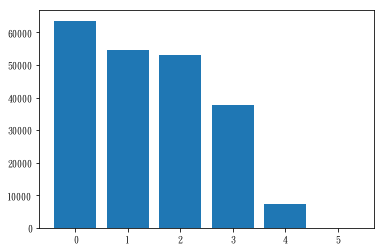

In [53]:
## 時間趨勢
import matplotlib.pyplot as plt 
# 中文設定
from matplotlib import rcParams
rcParams["font.sans-serif"] = ["kaiu"] 
rcParams["font.family"] ="DFKai-sb"

plt.bar(range(len(count)),height=count, label='count')     
plt.show()

In [54]:
df2.to_csv( path +"_PTT/Gossiping.csv") 

In [55]:
import pickle
# pd 為前面產生的 dataframe
with open(path+"_PTT/Gossiping.pkl", "wb") as fp:   #Pickling
     pickle.dump(df, fp)

In [5]:
#####################################################################
import pandas as pd
path='d:/My python/'
df=pd.read_csv(path+"_PTT/Gossiping.csv", index_col=None)

In [6]:
print(len(df))
df.head()

216209


,Unnamed: 0,name,ym,title,date,month,year,push,trash,text
0,0,"編輯cloudlydot (111.243.44.117 臺灣), 11/17/2019 ...",201908,"編輯cloudlydot (111.243.44.117 臺灣), 11/17/2019 ...",43.4-lou-ly,lou,43.40,0,0,NaN
1,1,NaN,201908,NaN,43.4-lou-ly,lou,204.00,0,0,NaN
2,2,"編輯userkka (180.217.204.226 臺灣), 10/29/2019 13...",201908,"編輯userkka (180.217.204.226 臺灣), 10/29/2019 13...",2019-Aug- 8,Aug,2019.00,0,0,NaN
3,3,GIBA5566 (我叫山雞 雞8的雞),201909,[問卦] 房子震壞颱風又要來,2019-Aug- 8,Aug,2.14,3,5,NaN
4,4,"編輯hk5566 (111.253.12.14 臺灣), 10/07/2019 23:29:5",201909,"編輯hk5566 (111.253.12.14 臺灣), 10/07/2019 23:29:5",2019-Aug- 8,Aug,2.14,0,0,NaN


# 隨機篩選5000篇

In [8]:
# 隨機抽取 5000篇
import random
df2019=df[df.year==2019]
df2019

,Unnamed: 0,name,ym,title,date,month,year,push,trash,text
2,2,"編輯userkka (180.217.204.226 臺灣), 10/29/2019 13...",201908,"編輯userkka (180.217.204.226 臺灣), 10/29/2019 13...",2019-Aug- 8,Aug,2019.0,0,0,NaN
6,6,yaihome (言哥),201909,[問卦] 油價下週漲翻啦,2019-Sep-17,Sep,2019.0,3,4,NaN
11,11,cct1527 (搖滾在手指上),201909,[問卦] 外科醫生又不是只有柯p一人,2019-Aug- 2,Aug,2019.0,5,10,NaN
14,14,ezpeer15 (藍山咖啡),201909,Re: [問卦] 有玩過龍族的人 現在都幾歲了,2019-Sep-30,Sep,2019.0,5,1,NaN
15,15,NaN,201909,NaN,2019-Sep-30,Sep,2019.0,0,0,NaN
16,16,b8301013 (葉子),201909,Re: [問卦] 有羅馬李廣---凱薩的八卦？,2019-Sep-13,Sep,2019.0,2,1,NaN
18,18,ppt123 (xp),201911,Re: [新聞] 美國拍板售波蘭32架F-35 總價65億美金,2019-Sep-12,Sep,2019.0,14,0,...
19,19,noabstersion (杯麵的哥哥-碗麵),201909,Re: [新聞] 全東亞剩日本、台灣未爆非洲豬瘟！,2019-Sep-18,Sep,2019.0,4,3,...
20,20,dake (V FOR VENDETTA),201911,Re: [新聞] 「軍公教為何挺『信用破產』的韓國瑜」？,2019-Nov- 3,Nov,2019.0,17,1,...
22,22,kusowan (你感受一下),201910,Re: [新聞] 蔡英文博士論文是真是假？ 同寢室「證人,2019-Sep-11,Sep,2019.0,13,3,...


In [9]:
sel=random.sample(range(len(df2019)), 5000)
df_sel=df.iloc[sel]
len(df_sel)
df_sel

,Unnamed: 0,name,ym,title,date,month,year,push,trash,text
38058,38060,mike143677 (包子大撒避),201910,[問卦] 鳳梨蝦球的鳳梨是不是超級冗員？,2019-Oct-19,Oct,2019.0,17,7,https://i.imgur.com/ZvsQTpL.jpg 小弟超愛吃鳳梨蝦球這道菜 ...
149116,149119,kent21413 (kent),201910,[問卦] 慟！再一個月一年又結束了,2019-Nov-23,Nov,2019.0,4,1,是這樣的 再一個月又要跨年呢 好像有點快 一年過去各位有甚麼還沒有完成的事情嗎? 剩一個月...
73740,73742,abx310492 (胖宅男),201907,[問卦] 微軟是不是放棄IE了,2019-Aug-25,Aug,2019.0,16,1,剛電腦重灌，裝完chrome要把它設為預設瀏覽器時 發現點一下就好了 以前微軟還會要你確認...
50950,50952,Metallicat (金屬製貓),201908,[問卦] 我根本不屑中秋烤肉這種商業操作?陋習,2019-Sep-10,Sep,2019.0,11,2,中秋節是拿來賞月 吃月餅 柚子 不知何時，台灣人被烤肉醬公司給洗腦 覺得中秋一定要烤肉，變...
180664,180667,IamCuteGirl (CuteGirl5566),201908,Re: [問卦] 哪邊有賣帥哥西裝啊 ☹,2019-Oct-17,Oct,2019.0,0,0,笨笨..你沒看懂原意啦.. 那個帥哥西裝是指$$$ 不管高矮胖瘦 身上有了變帥西裝（錢） ...
178726,178729,ccxx9999 (0-0),201910,[問卦] 真的以前有半年就考上台大甚至醫科的嗎,2019-Sep-16,Sep,2019.0,8,2,真的以前建中北一有人高中玩很瘋 都沒在唸書只靠半年狂唸書就考上台大甚至醫科的嗎？
194213,194216,cores (24番),201910,[新聞] 談司法改革 陳師孟嘆：豬吠火車,2019-Oct-27,Oct,2019.0,6,9,談司法改革 陳師孟嘆：豬吠火車 https://news.ltn.com.tw/news/...
135969,135972,Pcom (Pcom),201910,Re: [新聞] 「貪污說」惹怒蔡英文幕僚 柯文哲嗆：我,2019-Aug- 5,Aug,2019.0,4,2,我是這樣認為啦 柯文哲本人應該到地檢署按鈴告發他所認為的每位蔡英文旁邊有貪污的人 民進黨的...
212369,212374,Number87 (人畜無害),201911,[問卦]最近是喇牙的盛產期嗎,2019-Aug- 4,Aug,2019.0,6,2,餓死抬頭 最近真的真的一直發現家裡外面裡面都有喇牙的蹤跡，真的是異常的頻繁出現 我知道喇牙...
145257,145260,pchunters123 (pp),201910,[新聞] 集集彩繪列車調整石虎設計 全新圖樣出爐,2019-Aug-27,Aug,2019.0,14,8,新頭殼 謝佳真 集集彩繪列車調整石虎設計 全新圖樣出爐 https://s.newtalk...


In [10]:
df_sel.to_csv( path +"_PTT/Gossiping_ran2019_5000.csv") 

In [11]:
df_sel

,Unnamed: 0,name,ym,title,date,month,year,push,trash,text
38058,38060,mike143677 (包子大撒避),201910,[問卦] 鳳梨蝦球的鳳梨是不是超級冗員？,2019-Oct-19,Oct,2019.0,17,7,https://i.imgur.com/ZvsQTpL.jpg 小弟超愛吃鳳梨蝦球這道菜 ...
149116,149119,kent21413 (kent),201910,[問卦] 慟！再一個月一年又結束了,2019-Nov-23,Nov,2019.0,4,1,是這樣的 再一個月又要跨年呢 好像有點快 一年過去各位有甚麼還沒有完成的事情嗎? 剩一個月...
73740,73742,abx310492 (胖宅男),201907,[問卦] 微軟是不是放棄IE了,2019-Aug-25,Aug,2019.0,16,1,剛電腦重灌，裝完chrome要把它設為預設瀏覽器時 發現點一下就好了 以前微軟還會要你確認...
50950,50952,Metallicat (金屬製貓),201908,[問卦] 我根本不屑中秋烤肉這種商業操作?陋習,2019-Sep-10,Sep,2019.0,11,2,中秋節是拿來賞月 吃月餅 柚子 不知何時，台灣人被烤肉醬公司給洗腦 覺得中秋一定要烤肉，變...
180664,180667,IamCuteGirl (CuteGirl5566),201908,Re: [問卦] 哪邊有賣帥哥西裝啊 ☹,2019-Oct-17,Oct,2019.0,0,0,笨笨..你沒看懂原意啦.. 那個帥哥西裝是指$$$ 不管高矮胖瘦 身上有了變帥西裝（錢） ...
178726,178729,ccxx9999 (0-0),201910,[問卦] 真的以前有半年就考上台大甚至醫科的嗎,2019-Sep-16,Sep,2019.0,8,2,真的以前建中北一有人高中玩很瘋 都沒在唸書只靠半年狂唸書就考上台大甚至醫科的嗎？
194213,194216,cores (24番),201910,[新聞] 談司法改革 陳師孟嘆：豬吠火車,2019-Oct-27,Oct,2019.0,6,9,談司法改革 陳師孟嘆：豬吠火車 https://news.ltn.com.tw/news/...
135969,135972,Pcom (Pcom),201910,Re: [新聞] 「貪污說」惹怒蔡英文幕僚 柯文哲嗆：我,2019-Aug- 5,Aug,2019.0,4,2,我是這樣認為啦 柯文哲本人應該到地檢署按鈴告發他所認為的每位蔡英文旁邊有貪污的人 民進黨的...
212369,212374,Number87 (人畜無害),201911,[問卦]最近是喇牙的盛產期嗎,2019-Aug- 4,Aug,2019.0,6,2,餓死抬頭 最近真的真的一直發現家裡外面裡面都有喇牙的蹤跡，真的是異常的頻繁出現 我知道喇牙...
145257,145260,pchunters123 (pp),201910,[新聞] 集集彩繪列車調整石虎設計 全新圖樣出爐,2019-Aug-27,Aug,2019.0,14,8,新頭殼 謝佳真 集集彩繪列車調整石虎設計 全新圖樣出爐 https://s.newtalk...


In [12]:
#####################################################################
import pandas as pd
path='d:/My python/'
df=pd.read_csv(path+"_PTT/Gossiping_ran2019_5000.csv", index_col=None)

In [13]:
df

,Unnamed: 0,Unnamed: 0.1,name,ym,title,date,month,year,push,trash,text
0,38058,38060,mike143677 (包子大撒避),201910,[問卦] 鳳梨蝦球的鳳梨是不是超級冗員？,2019-Oct-19,Oct,2019.0,17,7,https://i.imgur.com/ZvsQTpL.jpg 小弟超愛吃鳳梨蝦球這道菜 ...
1,149116,149119,kent21413 (kent),201910,[問卦] 慟！再一個月一年又結束了,2019-Nov-23,Nov,2019.0,4,1,是這樣的 再一個月又要跨年呢 好像有點快 一年過去各位有甚麼還沒有完成的事情嗎? 剩一個月...
2,73740,73742,abx310492 (胖宅男),201907,[問卦] 微軟是不是放棄IE了,2019-Aug-25,Aug,2019.0,16,1,剛電腦重灌，裝完chrome要把它設為預設瀏覽器時 發現點一下就好了 以前微軟還會要你確認...
3,50950,50952,Metallicat (金屬製貓),201908,[問卦] 我根本不屑中秋烤肉這種商業操作?陋習,2019-Sep-10,Sep,2019.0,11,2,中秋節是拿來賞月 吃月餅 柚子 不知何時，台灣人被烤肉醬公司給洗腦 覺得中秋一定要烤肉，變...
4,180664,180667,IamCuteGirl (CuteGirl5566),201908,Re: [問卦] 哪邊有賣帥哥西裝啊 ☹,2019-Oct-17,Oct,2019.0,0,0,笨笨..你沒看懂原意啦.. 那個帥哥西裝是指$$$ 不管高矮胖瘦 身上有了變帥西裝（錢） ...
5,178726,178729,ccxx9999 (0-0),201910,[問卦] 真的以前有半年就考上台大甚至醫科的嗎,2019-Sep-16,Sep,2019.0,8,2,真的以前建中北一有人高中玩很瘋 都沒在唸書只靠半年狂唸書就考上台大甚至醫科的嗎？
6,194213,194216,cores (24番),201910,[新聞] 談司法改革 陳師孟嘆：豬吠火車,2019-Oct-27,Oct,2019.0,6,9,談司法改革 陳師孟嘆：豬吠火車 https://news.ltn.com.tw/news/...
7,135969,135972,Pcom (Pcom),201910,Re: [新聞] 「貪污說」惹怒蔡英文幕僚 柯文哲嗆：我,2019-Aug- 5,Aug,2019.0,4,2,我是這樣認為啦 柯文哲本人應該到地檢署按鈴告發他所認為的每位蔡英文旁邊有貪污的人 民進黨的...
8,212369,212374,Number87 (人畜無害),201911,[問卦]最近是喇牙的盛產期嗎,2019-Aug- 4,Aug,2019.0,6,2,餓死抬頭 最近真的真的一直發現家裡外面裡面都有喇牙的蹤跡，真的是異常的頻繁出現 我知道喇牙...
9,145257,145260,pchunters123 (pp),201910,[新聞] 集集彩繪列車調整石虎設計 全新圖樣出爐,2019-Aug-27,Aug,2019.0,14,8,新頭殼 謝佳真 集集彩繪列車調整石虎設計 全新圖樣出爐 https://s.newtalk...
